<a href="https://colab.research.google.com/github/Fabian-lewis/medical-diagnostic-pricing-audit/blob/main/data_cleaning_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load Data
from google.colab import files

# Upload File
uploaded = files.upload()

# Convert the CSV file into a dataframe
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# display the data
df.head()

Saving Medical Cost Personal Datasets.csv to Medical Cost Personal Datasets.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Step 1: Convert Categorical Variables
"""
1. Smoker - Binary
2. Region - Categorical
3. Sex - Categorical
"""

# Copy the data
data = df.copy()

# COnvert Smoker → Binary
data ['smoker_binary'] = data['smoker'].map({'yes':1, 'no':0})

data[['smoker', 'smoker_binary']].drop_duplicates()

# Convert Sex & Region to Categorical
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')


print("-"*80)
print("Data Types")
print("-"*80)
print(data.dtypes)

--------------------------------------------------------------------------------
Data Types
--------------------------------------------------------------------------------
age                 int64
sex              category
bmi               float64
children            int64
smoker             object
region           category
charges           float64
smoker_binary       int64
dtype: object


In [4]:
## Step 2: Define BMI Category Logic

def bmi_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi >= 18.5 and bmi < 25:
    return 'Normal'
  elif bmi >= 25 and bmi < 30:
    return 'Overweight'
  else:
    return 'Obese'

# Apply to dataset
data['bmi_category'] = data['bmi'].apply(bmi_category)

# Verify
print("-"*80)
print("BMI Category")
print("-"*80)
print(data[['bmi','bmi_category']].head())

--------------------------------------------------------------------------------
BMI Category
--------------------------------------------------------------------------------
      bmi bmi_category
0  27.900   Overweight
1  33.770        Obese
2  33.000        Obese
3  22.705       Normal
4  28.880   Overweight


In [9]:
## Step 3: Create Interaction Term
"""
Non-smokers → interaction = 0
Smokers - interaction increases as BMI increases
This isolates compounded risk
"""

data['bmi_smoker_interaction'] = data['bmi'] * data['smoker_binary']


## Step 4: Check for outliers and Invalid Values
print("-"*80)
print("Charges = 0 \n")
print(data[data['charges']==0])

valid_charges = data[data['charges']>0]
print("\nCount of Valid Data\n", valid_charges.shape[0])


print("-"*80)
print("Sanity Check for BMI & AGE")
print("-"*80)
print(data.describe())

--------------------------------------------------------------------------------
Charges = 0 

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, smoker_binary, bmi_category, bmi_smoker_interaction]
Index: []

Count of Valid Data
 1338
--------------------------------------------------------------------------------
Sanity Check for BMI & AGE
--------------------------------------------------------------------------------
               age          bmi     children       charges  smoker_binary  \
count  1338.000000  1338.000000  1338.000000   1338.000000    1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265       0.204783   
std      14.049960     6.098187     1.205493  12110.011237       0.403694   
min      18.000000    15.960000     0.000000   1121.873900       0.000000   
25%      27.000000    26.296250     0.000000   4740.287150       0.000000   
50%      39.000000    30.400000     1.000000   9382.033000       0.000000   
75%      51

In [11]:
## Step 5: FInal Data Readiness Check
print("-"*80)
print("Final Data Readiness Check")
print("-"*80)
print(data.head())

print("\n")
print("-"*80)
print("Check for Missing Values")
print("-"*80)
print(data.isnull().sum())

print("\n")
print("-"*80)
print("Confirm Category Counts")
print("-"*80)
print("Smoker Binary Category:\n",data['smoker_binary'].value_counts())
print("BMI Binary Category:\n",data['bmi_category'].value_counts())


--------------------------------------------------------------------------------
Final Data Readiness Check
--------------------------------------------------------------------------------
   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   smoker_binary bmi_category  bmi_smoker_interaction  
0              1   Overweight                    27.9  
1              0        Obese                     0.0  
2              0        Obese                     0.0  
3              0       Normal                     0.0  
4              0   Overweight                     0.0  


----------------------------------------------------------------------

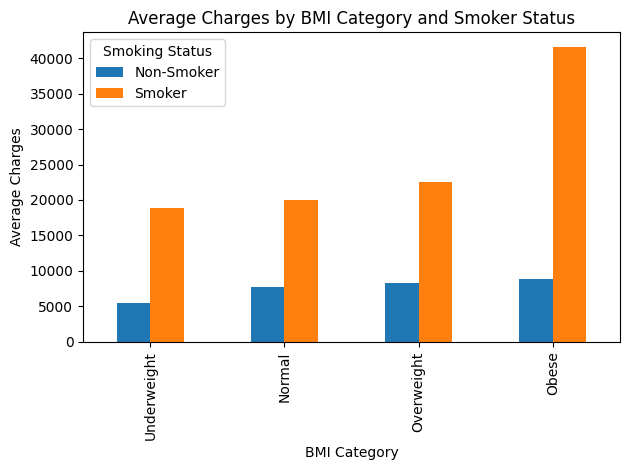




--------------------------------------------------------------------------------
Summary Table
--------------------------------------------------------------------------------
  bmi_category  smoker_binary        age        bmi       charges
6  Underweight              0  33.666667  17.521333   5532.992453
7  Underweight              1  28.400000  17.701000  18809.824980
0       Normal              0  36.314286  22.582229   7685.656014
1       Normal              1  38.200000  22.734800  19942.223641
4   Overweight              0  39.089744  27.609535   8257.961955
5   Overweight              1  38.216216  27.573311  22495.874163
2        Obese              0  40.658363  35.203959   8842.691548
3        Obese              1  39.124138  35.506517  41557.989840


In [21]:
## Step 6: Create Summary Table
summary = data[['age', 'bmi', 'charges', 'smoker_binary', 'bmi_category']].groupby(['bmi_category','smoker_binary']).mean()


# Pivot table for plotting
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']

summary_reset['bmi_category'] = pd.Categorical(
    summary_reset['bmi_category'],
    categories=bmi_order,
    ordered=True
)

pivot_charges = summary_reset.pivot(
    index='bmi_category',
    columns='smoker_binary',
    values='charges'
)

# Plot
ax = pivot_charges.plot(kind='bar')

plt.title('Average Charges by BMI Category and Smoker Status')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')

# Change Legend Labels
ax.legend(['Non-Smoker', 'Smoker'], title='Smoking Status')
plt.tight_layout()
plt.show()

# Order Summary Table
summary = summary.reset_index()
summary['bmi_category'] = pd.Categorical(
    summary['bmi_category'],
    categories=bmi_order,
    ordered=True
)

summary = (
    summary.sort_values('bmi_category')
)

print("\n\n")
print("-"*80)
print("Summary Table")
print("-"*80)
print(summary)

### Key Insight
Notice that in the Obese + Smoker (1) category, the  average **charges** are almost **double** those of Overweight + Smoker (1) Category

In [22]:
## download the data
data.to_csv('cleaned_insurance_data.csv')
files.download('cleaned_insurance_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>